<a href="https://colab.research.google.com/github/adhilnajeeb7/ICT/blob/main/linear_regression1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# import pandas
import pandas as pd
import numpy as np

In [ ]:
from google.colab import files
files.upload()

Saving Salary_dataset.csv to Salary_dataset.csv


{'Salary_dataset.csv': b',YearsExperience,Salary\n0,1.2000000000000002,39344.0\n1,1.4000000000000001,46206.0\n2,1.6,37732.0\n3,2.1,43526.0\n4,2.3000000000000003,39892.0\n5,3.0,56643.0\n6,3.1,60151.0\n7,3.3000000000000003,54446.0\n8,3.3000000000000003,64446.0\n9,3.8000000000000003,57190.0\n10,4.0,63219.0\n11,4.1,55795.0\n12,4.1,56958.0\n13,4.199999999999999,57082.0\n14,4.6,61112.0\n15,5.0,67939.0\n16,5.199999999999999,66030.0\n17,5.3999999999999995,83089.0\n18,6.0,81364.0\n19,6.1,93941.0\n20,6.8999999999999995,91739.0\n21,7.199999999999999,98274.0\n22,8.0,101303.0\n23,8.299999999999999,113813.0\n24,8.799999999999999,109432.0\n25,9.1,105583.0\n26,9.6,116970.0\n27,9.7,112636.0\n28,10.4,122392.0\n29,10.6,121873.0\n'}

In [ ]:
# read CSV file from the 'data' subdirectory using a relative path
data = pd.read_csv('Salary_dataset.csv', index_col=0)

# display the first 5 rows
data.head(10)

,YearsExperience,Salary
0,1.2,39344.0
1,1.4,46206.0
2,1.6,37732.0
3,2.1,43526.0
4,2.3,39892.0
5,3.0,56643.0
6,3.1,60151.0
7,3.3,54446.0
8,3.3,64446.0
9,3.8,57190.0


Primary object types:

- **DataFrame:** rows and columns (like a spreadsheet)
- **Series:** a single column

In [ ]:
# display the last 5 rows
data.tail()

,YearsExperience,Salary
25,9.1,105583.0
26,9.6,116970.0
27,9.7,112636.0
28,10.4,122392.0
29,10.6,121873.0


In [ ]:
# check the shape of the DataFrame (rows, columns)
data.shape

(30, 2)

What are the features?
- **TV:** advertising dollars spent on TV for a single product in a given market (in thousands of dollars)
- **Radio:** advertising dollars spent on Radio
- **Newspaper:** advertising dollars spent on Newspaper

What is the response?
- **Sales:** sales of a single product in a given market (in thousands of items)

What else do we know?
- Because the response variable is continuous, this is a **regression** problem.
- There are 200 **observations** (represented by the rows), and each observation is a single market.

## Visualizing data


In [ ]:
# conventional way to import seaborn
import matplotlib.pyplot as plt

# allow plots to appear within the notebook
%matplotlib inline

<Axes: xlabel='YearsExperience', ylabel='Salary'>

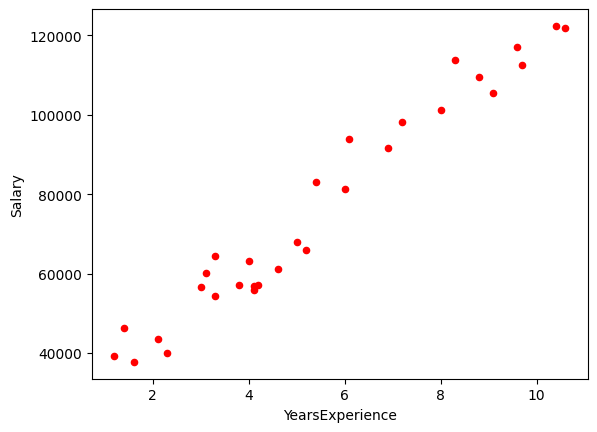

In [ ]:
data.plot(kind='scatter',x='YearsExperience',y='Salary',color='red')


## Linear regression

**Pros:** fast, no tuning required, highly interpretable, well-understood

**Cons:** unlikely to produce the best predictive accuracy (presumes a linear relationship between the features and response)

### Form of linear regression

$y = \beta_0 + \beta_1x_1 + \beta_2x_2 + ... + \beta_nx_n$

- $y$ is the response
- $\beta_0$ is the intercept
- $\beta_1$ is the coefficient for $x_1$ (the first feature)
- $\beta_n$ is the coefficient for $x_n$ (the nth feature)

In this case:

$y = \beta_0 + \beta_1 \times TV + \beta_2 \times Radio + \beta_3 \times Newspaper$

The $\beta$ values are called the **model coefficients**. These values are "learned" during the model fitting step using the "least squares" criterion. Then, the fitted model can be used to make predictions!

## Preparing X and y using pandas

- scikit-learn expects X (feature matrix) and y (response vector) to be NumPy arrays.
- However, pandas is built on top of NumPy.
- Thus, X can be a pandas DataFrame and y can be a pandas Series!

In [ ]:
# create a Python list of feature names
feature_cols = ['YearsExperience']

# use the list to select a subset of the original DataFrame
X = data[feature_cols]

# equivalent command to do this in one line
X = data[['YearsExperience']]

# print the first 5 rows
X.head()


,YearsExperience
0,1.2
1,1.4
2,1.6
3,2.1
4,2.3


In [ ]:
# check the type and shape of X
print(type(X))
print(X.shape)

<class 'pandas.core.frame.DataFrame'>
(30, 1)


In [ ]:
# select a Series from the DataFrame
lab = ['Salary']

# equivalent command that works if there are no spaces in the column name
y =  data['Salary']



# print the first 5 values
y.head()

0    39344.0
1    46206.0
2    37732.0
3    43526.0
4    39892.0
Name: Salary, dtype: float64

In [ ]:
# check the type and shape of y
print(type(y))
print(y.shape)

<class 'pandas.core.series.Series'>
(30,)


## Splitting X and y into training and testing sets

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [ ]:
# default split is 75% for training and 25% for testing
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)
# X_train = X_train[:150]

print(X_test)

(22, 1)
(22,)
(8, 1)
(8,)
    YearsExperience
17              5.4
21              7.2
10              4.0
19              6.1
14              4.6
20              6.9
26              9.6
3               2.1


## Linear regression in scikit-learn

In [ ]:
# import model
from sklearn.linear_model import LinearRegression

# instantiate
linreg = LinearRegression()

# fit the model to the training data (learn the coefficients)
model = linreg.fit(X_train, y_train)



### Making predictions

In [ ]:
# make predictions on the testing set
y_pred = linreg.predict(X_test)
print(y_pred)
print(X_test)

[ 74979.61852009  91650.44173553  62013.42268586  81462.7164372
  67570.36375767  88871.97119962 113878.20602278  44416.44262512]
    YearsExperience
17              5.4
21              7.2
10              4.0
19              6.1
14              4.6
20              6.9
26              9.6
3               2.1


We need an **evaluation metric** in order to compare our predictions with the actual values!